In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# For data preparation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve

# For model evaluation
from sklearn import metrics

# For ML classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

Dans cet essai on va utiliser chaque capteur à part entière et ensuite classer suivant chaque capteur et par la suite voir quels sont les capteurs qui classent le mieux suivant nos 4 classes et puis tenter un vote entre les différents capteurs.
## Chargement des données

In [2]:
data_air = pd.read_csv('./csv_files/AIR.csv', sep=";", header=None)
data_control = pd.read_csv('./csv_files/CONTROL.csv', sep=";", header=None)
data_copd = pd.read_csv('./csv_files/COPD.csv', sep=";", header=None)
data_smokers = pd.read_csv('./csv_files/SMOKERS.csv', sep=";", header=None)

## Nettoyage des données

In [3]:
data_smokers.drop(list(range(64,128)), inplace=True, axis=1)
data_air.drop(list(range(4000,4080)), inplace=True, axis=0)

## Préparation des données
On va prendre pour chaque datasets chaque capteurs à part entière

In [15]:
def extract_capteur(data, samples) :
    data_capteur1 = []
    data_capteur2 = []
    data_capteur3 = []
    data_capteur4 = []
    data_capteur5 = []
    data_capteur6 = []
    data_capteur7 = []
    data_capteur8 = []
    for i in range(8) :
        for j in range(0,samples) :
            if i==0 : 
                data_capteur1.append(list(data[8*j]))
            elif i==1 :
                data_capteur2.append(list(data[i + 8*j]))
            elif i==2 :
                data_capteur3.append(list(data[i + 8*j]))
            elif i==3 :
                data_capteur4.append(list(data[i + 8*j]))
            elif i==4 :
                data_capteur5.append(list(data[i + 8*j]))
            elif i==5 :
                data_capteur6.append(list(data[i + 8*j]))
            elif i==6 :
                data_capteur7.append(list(data[i + 8*j]))
            elif i==7 :
                data_capteur8.append(list(data[i + 8*j]))
    return pd.DataFrame(data_capteur1),pd.DataFrame(data_capteur2),pd.DataFrame(data_capteur3),pd.DataFrame(data_capteur4),pd.DataFrame(data_capteur5),pd.DataFrame(data_capteur6),pd.DataFrame(data_capteur7),pd.DataFrame(data_capteur8)

In [19]:
data_capteur1_smoker, data_capteur2_smoker, data_capteur3_smoker, data_capteur4_smoker, data_capteur5_smoker, data_capteur6_smoker, data_capteur7_smoker, data_capteur8_smoker = extract_capteur(data_smokers, 8)

data_capteur1_copd, data_capteur2_copd, data_capteur3_copd, data_capteur4_copd, data_capteur5_copd, data_capteur6_copd, data_capteur7_copd, data_capteur8_copd = extract_capteur(data_copd, 40)

data_capteur1_control, data_capteur2_control, data_capteur3_control, data_capteur4_control, data_capteur5_control, data_capteur6_control, data_capteur7_control, data_capteur8_control = extract_capteur(data_control, 20)

data_capteur1_air, data_capteur2_air, data_capteur3_air, data_capteur4_air, data_capteur5_air, data_capteur6_air, data_capteur7_air, data_capteur8_air = extract_capteur(data_air, 10)

On procède maintenant à la concaténation des données pour avoir 8 datasets distincts. Mais avant cela on passe à la labelisation

In [21]:
def label(data_capteur1,data_capteur2,data_capteur3,data_capteur4,data_capteur5,data_capteur6,data_capteur7,data_capteur8, label) :
    data_capteur1.insert(4000,"class",label)
    data_capteur2.insert(4000,"class",label)
    data_capteur3.insert(4000,"class",label)
    data_capteur4.insert(4000,"class",label)
    data_capteur5.insert(4000,"class",label)
    data_capteur6.insert(4000,"class",label)
    data_capteur7.insert(4000,"class",label)
    data_capteur8.insert(4000,"class",label)

In [22]:
label(data_capteur1_smoker,data_capteur2_smoker,data_capteur3_smoker,data_capteur4_smoker,data_capteur5_smoker,data_capteur6_smoker,data_capteur7_smoker,data_capteur8_smoker, "smoker")

label(data_capteur1_copd,data_capteur2_copd,data_capteur3_copd,data_capteur4_copd,data_capteur5_copd,data_capteur6_copd,data_capteur7_copd,data_capteur8_copd, "copd")

label(data_capteur1_control,data_capteur2_control,data_capteur3_control,data_capteur4_control,data_capteur5_control,data_capteur6_control,data_capteur7_control,data_capteur8_control, "control")

label(data_capteur1_air,data_capteur2_air,data_capteur3_air,data_capteur4_air,data_capteur5_air,data_capteur6_air,data_capteur7_air,data_capteur8_air, "air")

In [25]:
data_capteur1 = pd.concat([data_capteur1_smoker,data_capteur1_copd, data_capteur1_control, data_capteur1_air])

data_capteur2 = pd.concat([data_capteur2_smoker,data_capteur2_copd, data_capteur2_control, data_capteur2_air])

data_capteur3 = pd.concat([data_capteur3_smoker,data_capteur3_copd, data_capteur3_control, data_capteur3_air])

data_capteur4 = pd.concat([data_capteur4_smoker,data_capteur4_copd, data_capteur4_control, data_capteur4_air])

data_capteur5 = pd.concat([data_capteur5_smoker,data_capteur5_copd, data_capteur5_control, data_capteur5_air])

data_capteur6 = pd.concat([data_capteur6_smoker,data_capteur6_copd, data_capteur6_control, data_capteur6_air])

data_capteur7 = pd.concat([data_capteur7_smoker,data_capteur7_copd, data_capteur7_control, data_capteur7_air])

data_capteur8 = pd.concat([data_capteur8_smoker,data_capteur8_copd, data_capteur8_control, data_capteur8_air])

## Sauvegarde des datasets
On sauvegarde les datasets pour une utilisation future

In [26]:
data_capteur1.to_csv("./capteurs/capteur1.csv", index=False)
data_capteur2.to_csv("./capteurs/capteur2.csv", index=False)
data_capteur3.to_csv("./capteurs/capteur3.csv", index=False)
data_capteur4.to_csv("./capteurs/capteur4.csv", index=False)
data_capteur5.to_csv("./capteurs/capteur5.csv", index=False)
data_capteur6.to_csv("./capteurs/capteur6.csv", index=False)
data_capteur7.to_csv("./capteurs/capteur7.csv", index=False)
data_capteur8.to_csv("./capteurs/capteur8.csv", index=False)

# Classification en utilisant des algorithmes de Machine Learning
## KNN

In [42]:
def knncapteur(data, test_size) : 
    features = data.copy()
    etiq = features["class"]
    features.drop(["class"], axis=1, inplace=True)
    fv_train, fv_test, etiq_train, etiq_test = train_test_split(features, etiq, test_size=test_size,random_state=42)
    parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
    knn=KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters)
    clf.fit(fv_train,etiq_train)
    knn=KNeighborsClassifier(**clf.best_params_)
    knn.fit(fv_train,etiq_train)

    N, train_score, val_score = learning_curve(knn, fv_train, etiq_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)

    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(10,8))
    plt.plot(N, train_score.mean(axis=1), label='Train')
    plt.plot(N, val_score.mean(axis=1), label='Validation')
    plt.xlabel('Train sizes')
    plt.title('Learning curve')
    plt.legend()

    yknn=knn.predict(fv_test)
    print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn))
    print("F1-score KNN : ", metrics.f1_score(etiq_test, yknn, average='macro'))
    print(metrics.classification_report(etiq_test, yknn))

    plt.figure(figsize=(8,6))
    sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 10})
    plt.title('Confusion matrix KNN')

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9743589743589743
F1-score KNN :  0.9819976771196284
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.91      1.00      0.95        10
        copd       1.00      0.95      0.98        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.97        39
   macro avg       0.98      0.99      0.98        39
weighted avg       0.98      0.97      0.97        39



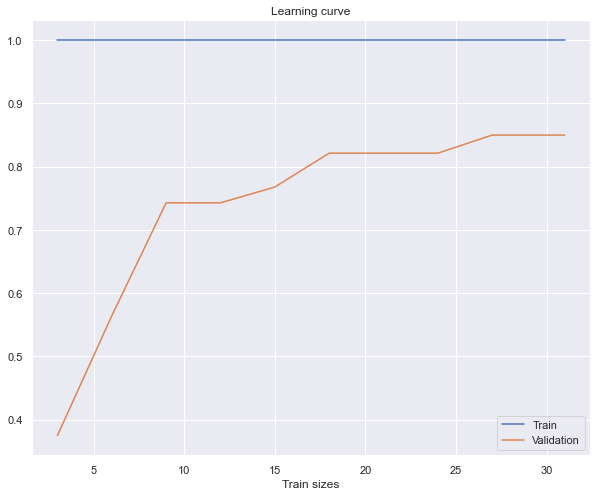

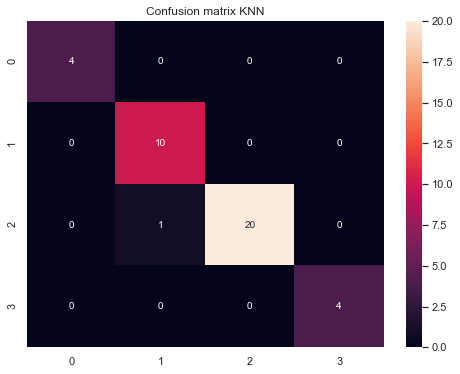

In [43]:
knncapteur(data=data_capteur1,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9487179487179487
F1-score KNN :  0.9647727272727273
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.83      1.00      0.91        10
        copd       1.00      0.90      0.95        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.95        39
   macro avg       0.96      0.98      0.96        39
weighted avg       0.96      0.95      0.95        39



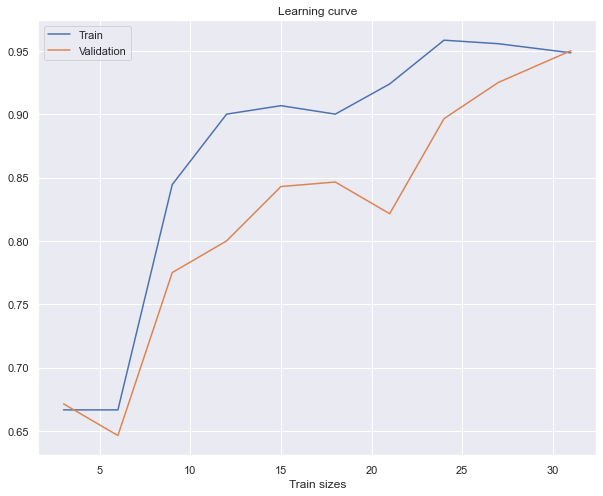

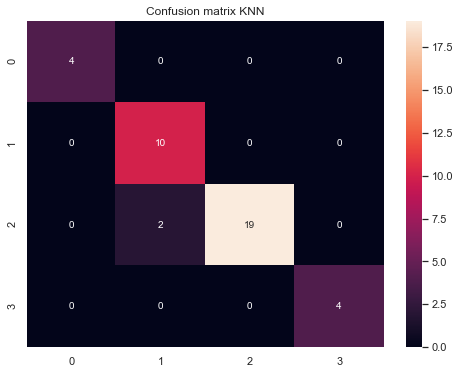

In [44]:
knncapteur(data=data_capteur2,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.sco

Accuracy :  0.9743589743589743
F1-score KNN :  0.9810281517747859
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       1.00      0.90      0.95        10
        copd       0.95      1.00      0.98        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.97        39
   macro avg       0.99      0.97      0.98        39
weighted avg       0.98      0.97      0.97        39



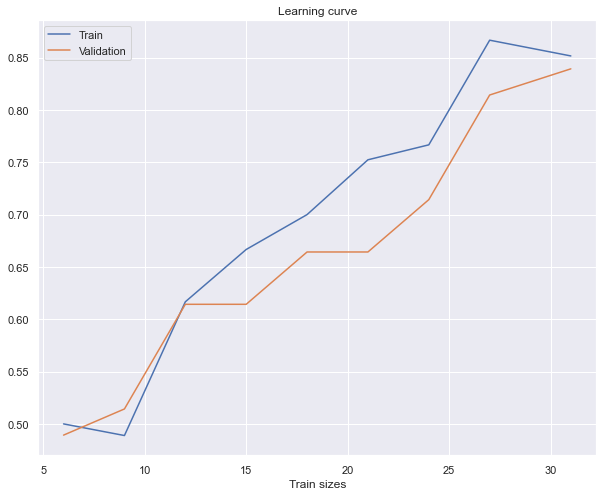

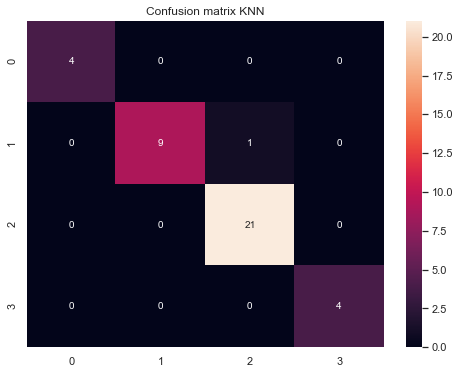

In [45]:
knncapteur(data=data_capteur3,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.sco

Accuracy :  0.8717948717948718
F1-score KNN :  0.846384008148714
              precision    recall  f1-score   support

         air       0.57      1.00      0.73         4
     control       0.86      0.60      0.71        10
        copd       0.95      0.95      0.95        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.87        39
   macro avg       0.85      0.89      0.85        39
weighted avg       0.89      0.87      0.87        39



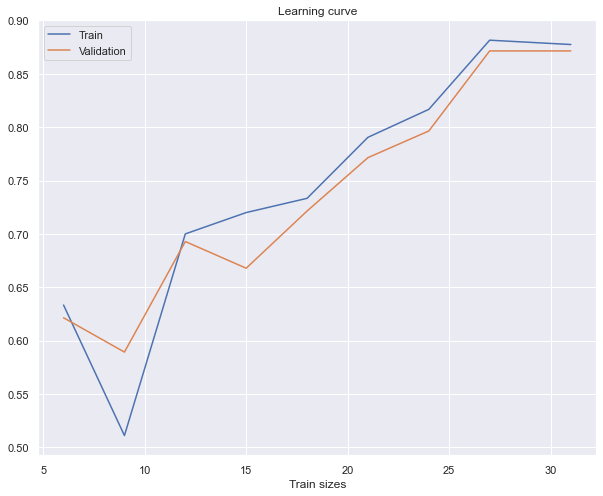

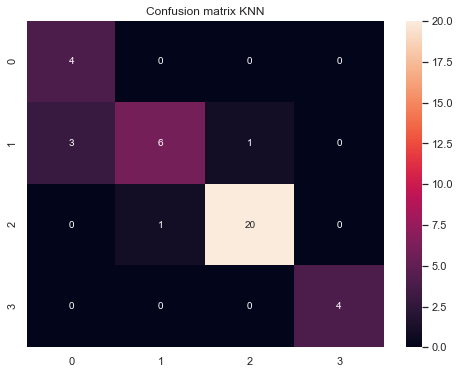

In [46]:
knncapteur(data=data_capteur4,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8717948717948718
F1-score KNN :  0.8712454212454213
              precision    recall  f1-score   support

         air       0.67      1.00      0.80         4
     control       0.73      0.80      0.76        10
        copd       1.00      0.86      0.92        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.87        39
   macro avg       0.85      0.91      0.87        39
weighted avg       0.90      0.87      0.88        39



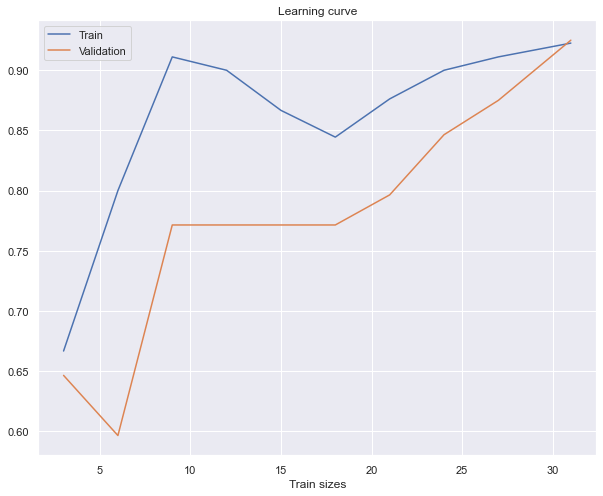

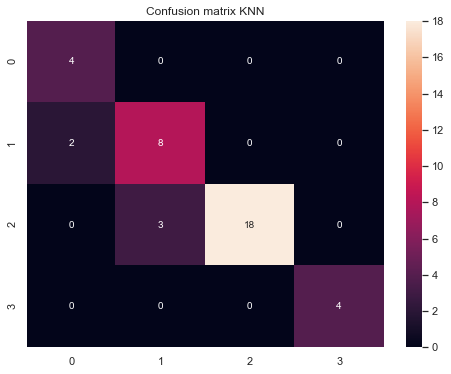

In [47]:
knncapteur(data=data_capteur5,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9743589743589743
F1-score KNN :  0.9810281517747859
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       1.00      0.90      0.95        10
        copd       0.95      1.00      0.98        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.97        39
   macro avg       0.99      0.97      0.98        39
weighted avg       0.98      0.97      0.97        39



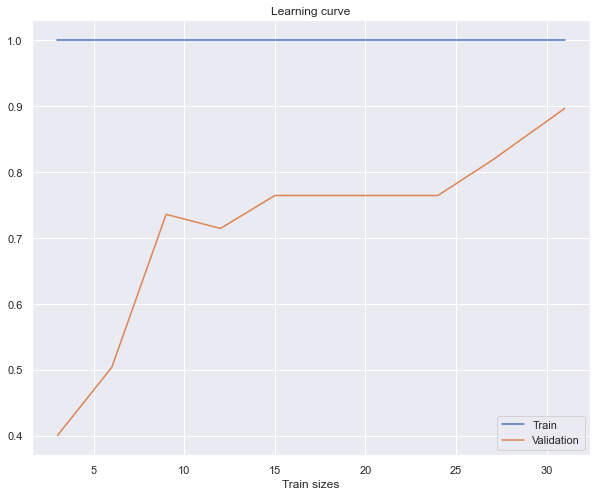

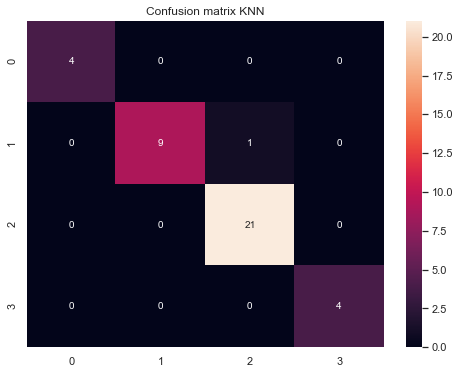

In [48]:
knncapteur(data=data_capteur6,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9743589743589743
F1-score KNN :  0.9810281517747859
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       1.00      0.90      0.95        10
        copd       0.95      1.00      0.98        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.97        39
   macro avg       0.99      0.97      0.98        39
weighted avg       0.98      0.97      0.97        39



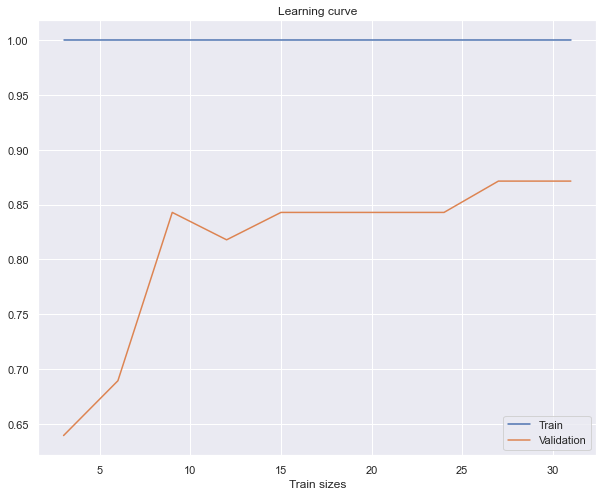

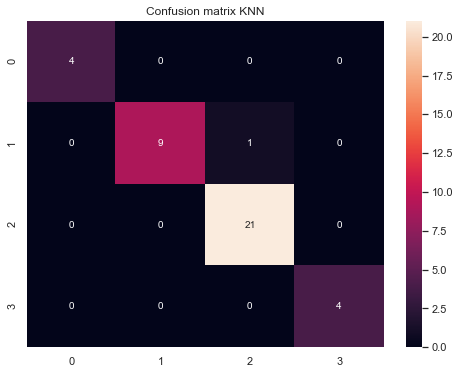

In [49]:
knncapteur(data=data_capteur7,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8974358974358975
F1-score KNN :  0.903929539295393
              precision    recall  f1-score   support

         air       0.80      1.00      0.89         4
     control       0.80      0.80      0.80        10
        copd       0.95      0.90      0.93        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.90        39
   macro avg       0.89      0.93      0.90        39
weighted avg       0.90      0.90      0.90        39



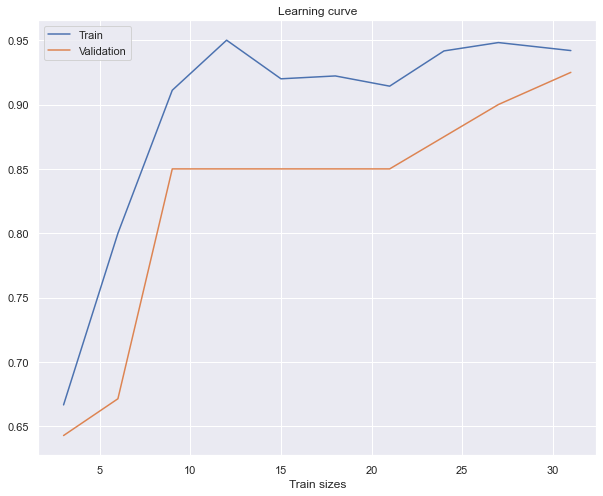

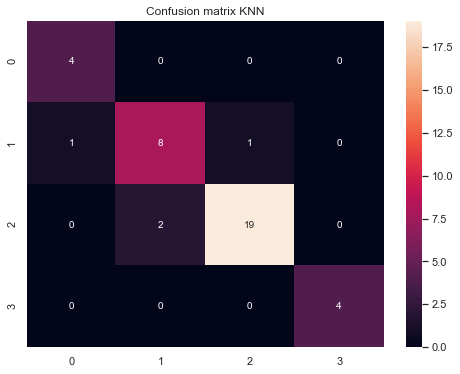

In [50]:
knncapteur(data=data_capteur8,test_size=0.5)

## SVM

In [51]:
def svmcapteur(data, test_size) :
    features = data.copy()
    etiq = features["class"]
    features.drop(["class"], axis=1, inplace=True)
    fv_train, fv_test, etiq_train, etiq_test = train_test_split(features, etiq, test_size=test_size,random_state=42)

    parameters = {'degree':np.arange(1,20,1)}
    svm=SVC(gamma='scale', class_weight='balanced')
    clf = GridSearchCV(svm, parameters)
    clf.fit(fv_train,etiq_train)
    svm=SVC(**clf.best_params_)
    svm.fit(fv_train,etiq_train)

    N, train_score, val_score = learning_curve(svm, fv_train, etiq_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(10,8))
    plt.plot(N, train_score.mean(axis=1), label='Train')
    plt.plot(N, val_score.mean(axis=1), label='Validation')
    plt.xlabel('Train sizes')
    plt.title('Learning curve')
    plt.legend()

    ysvm=svm.predict(fv_test)
    print("Accuracy : ",metrics.accuracy_score(etiq_test, ysvm))
    print("F1-score SVM : ",metrics.f1_score(etiq_test, ysvm, average='macro'))
    print(metrics.classification_report(etiq_test, ysvm))
    
    plt.figure(figsize=(8,6))
    sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm), annot=True, annot_kws={"size": 10})
    plt.title('Confusion matrix SVM')

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8974358974358975
F1-score SVM :  0.8275252525252526
              precision    recall  f1-score   support

         air       0.67      1.00      0.80         4
     control       1.00      0.80      0.89        10
        copd       0.91      1.00      0.95        21
      smoker       1.00      0.50      0.67         4

    accuracy                           0.90        39
   macro avg       0.89      0.82      0.83        39
weighted avg       0.92      0.90      0.89        39



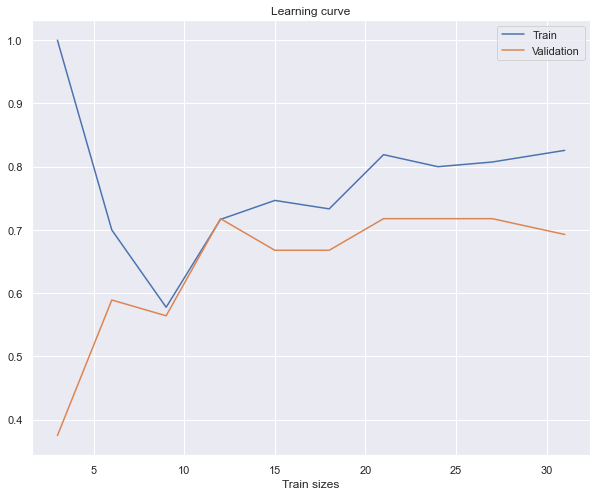

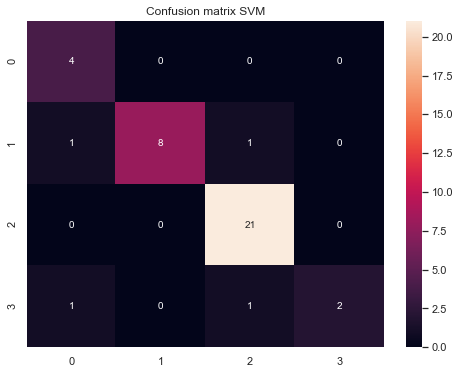

In [52]:
svmcapteur(data=data_capteur1,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9487179487179487
F1-score SVM :  0.963095238095238
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.90      0.90      0.90        10
        copd       0.95      0.95      0.95        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.95        39
   macro avg       0.96      0.96      0.96        39
weighted avg       0.95      0.95      0.95        39



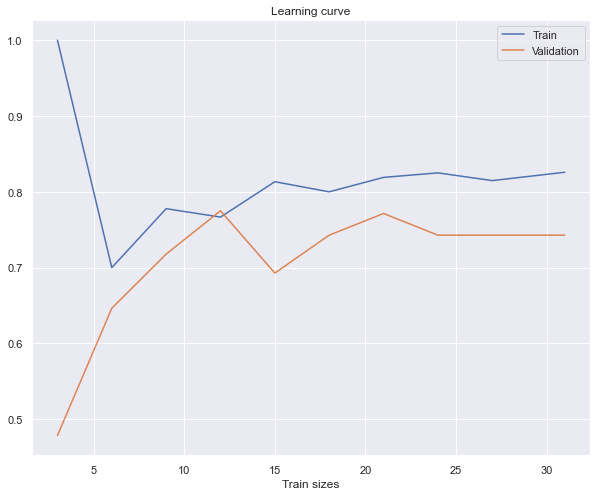

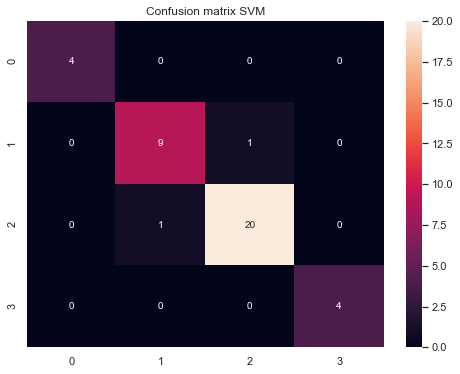

In [53]:
svmcapteur(data=data_capteur2,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9230769230769231
F1-score SVM :  0.9430844553243574
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.89      0.80      0.84        10
        copd       0.91      0.95      0.93        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.92        39
   macro avg       0.95      0.94      0.94        39
weighted avg       0.92      0.92      0.92        39



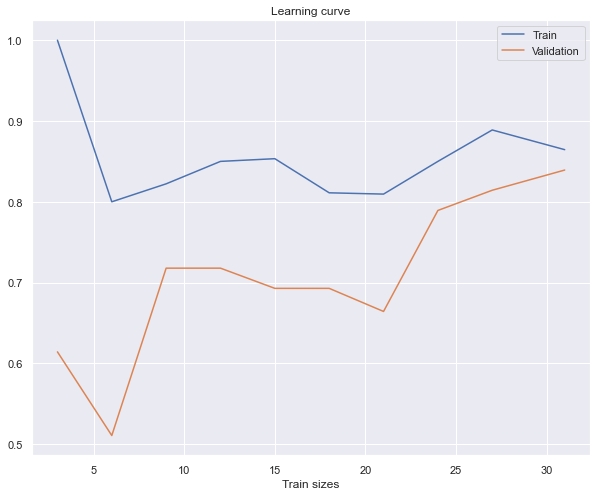

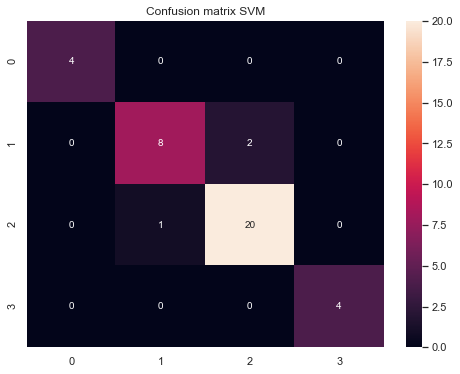

In [54]:
svmcapteur(data=data_capteur3,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.9230769230769231
F1-score SVM :  0.945993031358885
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.82      0.90      0.86        10
        copd       0.95      0.90      0.93        21
      smoker       1.00      1.00      1.00         4

    accuracy                           0.92        39
   macro avg       0.94      0.95      0.95        39
weighted avg       0.93      0.92      0.92        39



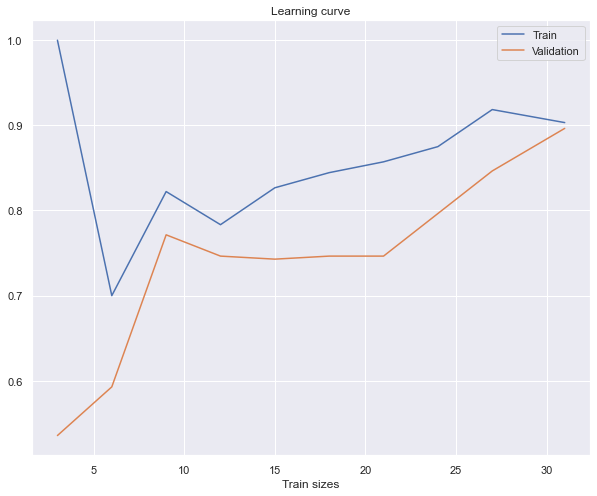

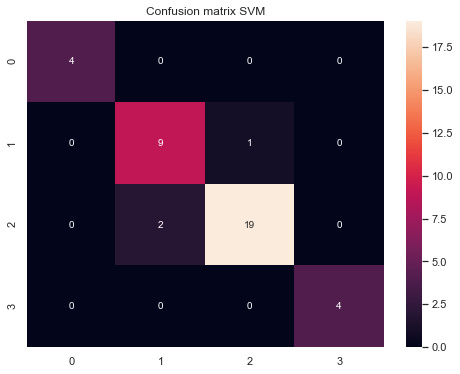

In [55]:
svmcapteur(data=data_capteur4,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8205128205128205
F1-score SVM :  0.6753968253968254
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.82      0.90      0.86        10
        copd       0.79      0.90      0.84        21
      smoker       0.00      0.00      0.00         4

    accuracy                           0.82        39
   macro avg       0.65      0.70      0.68        39
weighted avg       0.74      0.82      0.78        39



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


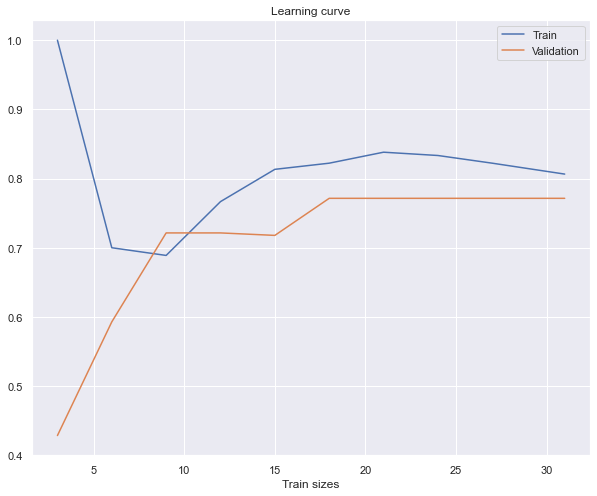

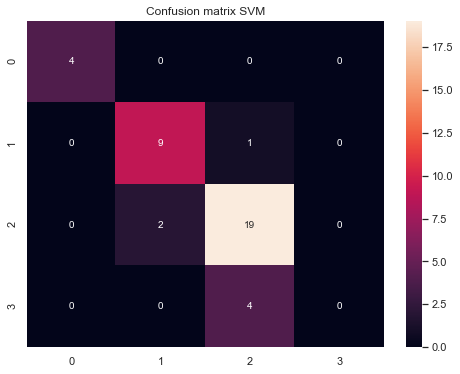

In [56]:
svmcapteur(data=data_capteur5,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8205128205128205
F1-score SVM :  0.6701680672268907
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       1.00      0.70      0.82        10
        copd       0.75      1.00      0.86        21
      smoker       0.00      0.00      0.00         4

    accuracy                           0.82        39
   macro avg       0.69      0.68      0.67        39
weighted avg       0.76      0.82      0.78        39



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


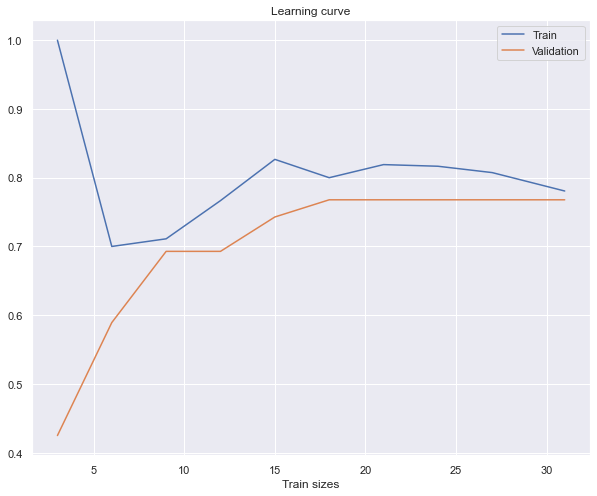

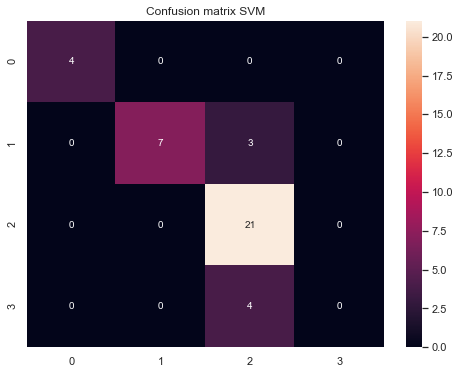

In [57]:
svmcapteur(data=data_capteur6,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8461538461538461
F1-score SVM :  0.7746323529411765
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       1.00      0.70      0.82        10
        copd       0.78      1.00      0.88        21
      smoker       1.00      0.25      0.40         4

    accuracy                           0.85        39
   macro avg       0.94      0.74      0.77        39
weighted avg       0.88      0.85      0.83        39



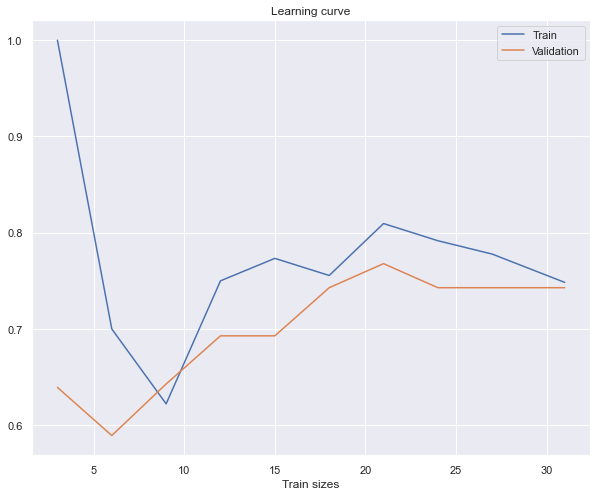

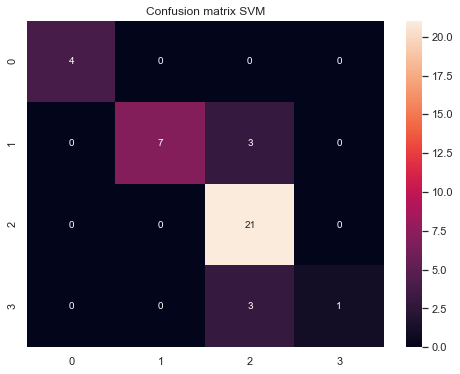

In [58]:
svmcapteur(data=data_capteur7,test_size=0.5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy :  0.8205128205128205
F1-score SVM :  0.6732922732362822
              precision    recall  f1-score   support

         air       1.00      1.00      1.00         4
     control       0.89      0.80      0.84        10
        copd       0.77      0.95      0.85        21
      smoker       0.00      0.00      0.00         4

    accuracy                           0.82        39
   macro avg       0.66      0.69      0.67        39
weighted avg       0.74      0.82      0.78        39



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


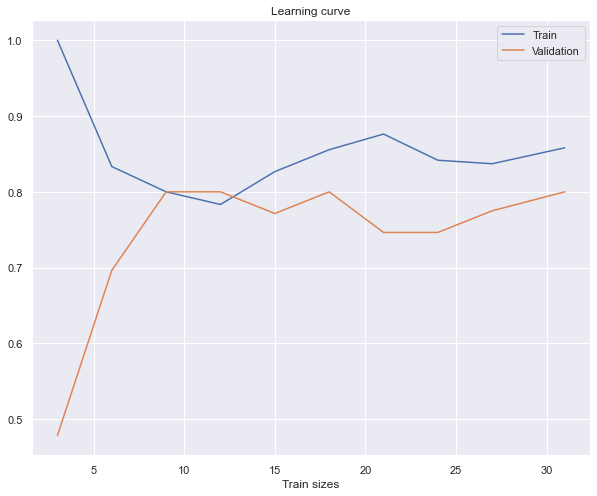

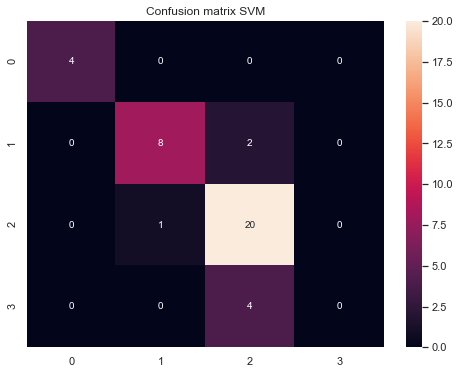

In [59]:
svmcapteur(data=data_capteur8,test_size=0.5)